In [1]:
#Author: Katarina Law
#Topic: Amazon Best Selling Books (2009 - 2022)

# Importing File

In [2]:
import pandas as pd

amazon_df = pd.read_csv("/Users/katarinalaw/Desktop/books_bestsellers.csv")

In [3]:
amazon_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13,2022,Non Fiction


In [4]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


# Data Cleaning

In [5]:
#checking to see if there is any null value
amazon_df.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [6]:
#checking to see if there is any duplicated rows
amazon_df.duplicated().any()

False

# Exploratory Data Analysis 

In [7]:
#importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#top 10 most featured books over the years
amazon_df.Name.value_counts().head(10)

The Very Hungry Caterpillar                                                          10
Publication Manual of the American Psychological Association, 6th Edition            10
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     9
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The 5 Love Languages: The Secret to Love that Lasts                                   8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
How to Win Friends & Influence People                                                 7
The Wonderful Things You Will Be                                                      6
Giraffes Can't Dance                                                                  6
Name: Name, dtype: int64

## Genre

In [9]:
#looking at the total count of each genre sold between 2009 to 2022
amazon_df.Genre.value_counts()

Non Fiction    388
Fiction        312
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

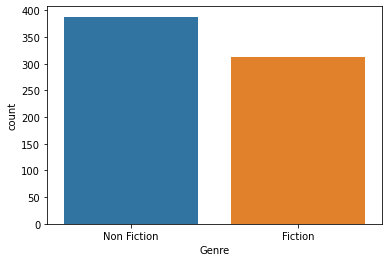

In [10]:
#plotting a barchart to show the total count of each genre sold between 2009 to 2022
sns.countplot(x = "Genre", data = amazon_df)

## Authors

In [11]:
#looking at the total number of top 10 best selling unique book counts by authors between 2009 to 2022
amazon_df.Author.value_counts().head(10)

Gary Chapman                          14
Jeff Kinney                           14
Suzanne Collins                       12
American Psychological Association    11
Rick Riordan                          11
Eric Carle                            10
Dr. Seuss                             10
Don Miguel Ruiz                        9
Gallup                                 9
Dav Pilkey                             9
Name: Author, dtype: int64

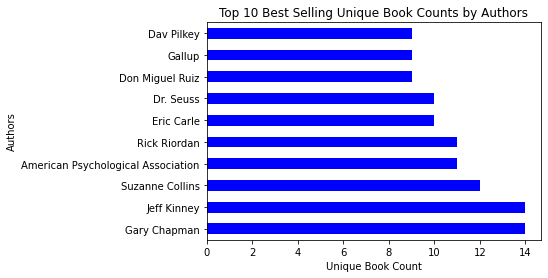

In [12]:
#plotting the barchart to show top 10 best selling unique book counts by authors between 2009 to 2022
amazon_df["Author"].value_counts().head(10).plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Top 10 Best Selling Unique Book Counts by Authors")
plt.xlabel("Unique Book Count")
plt.ylabel("Authors")

#showing graph
plt.show()

## User Rating

In [13]:
#looking at the max rating
amazon_df["User Rating"].max()

4.9

In [14]:
#looking at authors with ratings of 4.9
author_ratings = amazon_df[amazon_df["User Rating"] == 4.9].groupby("Author")["User Rating"].mean().reset_index()

author_ratings

,Author,User Rating
0,Alice Schertle,4.9
1,Amanda Gorman,4.9
2,Amelia Hepworth,4.9
3,Barack Obama,4.9
4,Bill Martin Jr.,4.9
5,Brandon Stanton,4.9
6,Chip Gaines,4.9
7,Dav Pilkey,4.9
8,Deborah Hopkinson,4.9
9,Dr. Seuss,4.9


## Reviews

In [15]:
#looking at the books with most reviews
book_reviews = pd.DataFrame(amazon_df.groupby("Name")["Reviews"].mean().sort_values(ascending = False).head(10))

book_reviews

,Reviews
Name,
Where the Crawdads Sing,168557.666667
The Midnight Library: A Novel,144313.500000
A Promised Land,121109.000000
Too Much and Never Enough: How My Family Created the World's Most Dangerous Man,100534.000000
The Four Winds: A Novel,96810.000000
"The Boy, the Mole, the Fox and the Horse",93749.000000
The Vanishing Half: A Novel,83490.000000
Becoming,80344.333333
The Girl on the Train,79446.000000


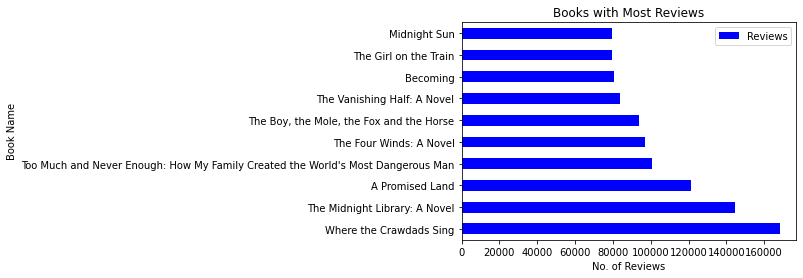

In [16]:
#plotting bar chart to visualize books with most reviews
book_reviews.plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Books with Most Reviews")
plt.xlabel("No. of Reviews")
plt.ylabel("Book Name")

#showing graph
plt.show()

In [17]:
#looking at the authors with most reviews
author_reviews = pd.DataFrame(amazon_df.groupby("Author")["Reviews"].mean().sort_values(ascending = False).head(10))

author_reviews


,Reviews
Author,
Delia Owens,168557.666667
Matt Haig,144313.500000
Barack Obama,121109.000000
Mary L. Trump Ph.D.,100534.000000
Charlie Mackesy,93749.000000
Brit Bennett,83490.000000
Michelle Obama,80344.333333
Paula Hawkins,79446.000000
Laura Dave,77903.000000


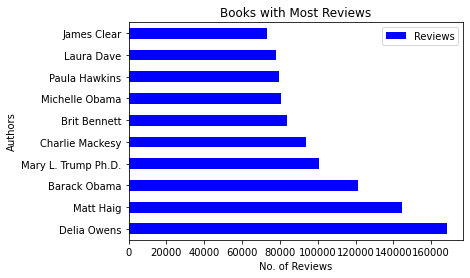

In [18]:
#plotting bar chart to visualize authors with most reviews
author_reviews.plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Books with Most Reviews")
plt.xlabel("No. of Reviews")
plt.ylabel("Authors")

#showing graph
plt.show()

## Price

In [19]:
#looking at the average price of books each year
avg_price = pd.DataFrame(amazon_df.groupby("Year").Price.mean())

avg_price

,Price
Year,
2009,15.40
2010,13.48
2011,15.10
2012,15.30
2013,14.60
2014,14.64
2015,10.42
2016,13.18
2017,11.38


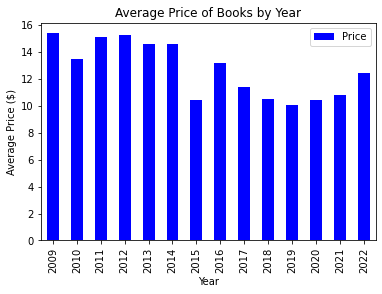

In [20]:
#plotting bar chart to visualize the average price of books each year
avg_price.plot(kind = "bar", color = "blue")

#adding title and axis names
plt.title("Average Price of Books by Year")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")

#showing graph
plt.show()

In [21]:
#looking at the average book price for different author
author_price = pd.DataFrame(amazon_df.groupby("Author")["Price"].mean().sort_values(ascending = False).head(10))

author_price

,Price
Author,
American Psychiatric Association,105.000000
Lin-Manuel Miranda,54.000000
Bill Simmons,53.000000
American Psychological Association,43.727273
Alan Moore,42.000000
The College Board,39.333333
J. K. Rowling,35.000000
Jaycee Dugard,32.000000
Thomas Piketty,28.000000


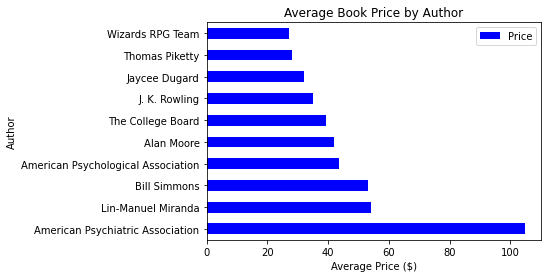

In [22]:
#plotting bar chart to visualize the average book price for different author
author_price.plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Average Book Price by Author")
plt.xlabel("Average Price ($)")
plt.ylabel("Author")

#showing graph
plt.show()

## Looking at Different Genre

### Fiction Books

In [23]:
fiction_books = amazon_df[amazon_df["Genre"] == "Fiction"]

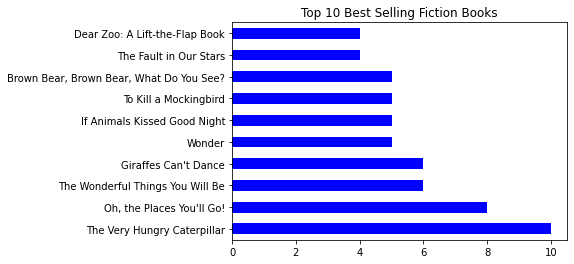

In [24]:
#looking at top 10 best selling book names for fiction books
fiction_books.Name.value_counts().head(10).plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Top 10 Best Selling Fiction Books")

#showing graph
plt.show()

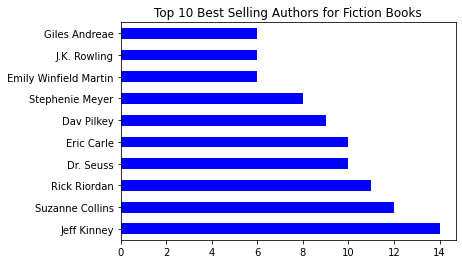

In [25]:
#looking at the top 10 best selling authors for fiction books
fiction_books.Author.value_counts().head(10).plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Top 10 Best Selling Authors for Fiction Books")

#showing graph
plt.show()

In [26]:
#finding the average price for fiction books
fiction_books["Price"].mean()

10.663461538461538

### Non-Fiction Books

In [27]:
non_fiction_books = amazon_df[amazon_df["Genre"] == "Non Fiction"]

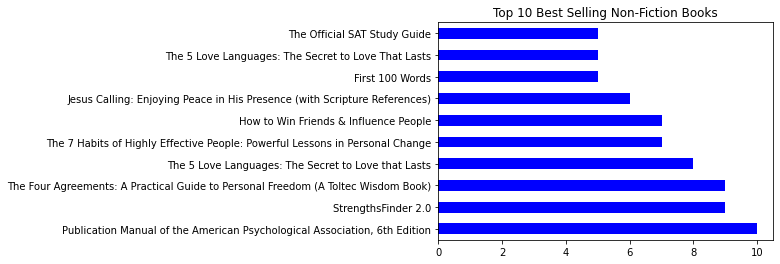

In [28]:
#looking at top 10 best selling book names for non-fiction books
non_fiction_books.Name.value_counts().head(10).plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Top 10 Best Selling Non-Fiction Books")

#showing graph
plt.show()

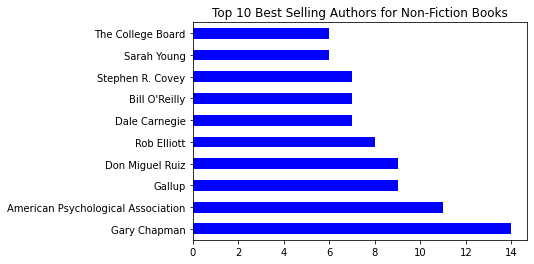

In [29]:
#looking at the top 10 best selling authors for non-fiction books
non_fiction_books.Author.value_counts().head(10).plot(kind = "barh", color = "blue")

#adding title and axis names
plt.title("Top 10 Best Selling Authors for Non-Fiction Books")

#showing graph
plt.show()

In [30]:
#finding the average price for non-fiction books
non_fiction_books["Price"].mean()

14.337628865979381